# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('/content/drive/MyDrive/DSBA/Supervised Learning/Project 3/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [6]:
# First few rows of dataset
data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [7]:
# Checking the shape
data.shape

(3454, 15)

There are 3,454 rows and 15 columns in the dataset

In [8]:
# Looking at the data types for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [9]:
# Statistical Summary
data.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

In [10]:
# Checking for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are some missing values in the dataset. We will process these later.

In [11]:
# Checking for duplicate rows
duplicates = data.duplicated().sum()
print("Duplicates found:", duplicates)

Duplicates found: 0


There appear to be no duplicated rows in the dataset.

In [12]:
# Creating a copy of the dataset so that the original remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis and Answers to above questions

#### Screen Size

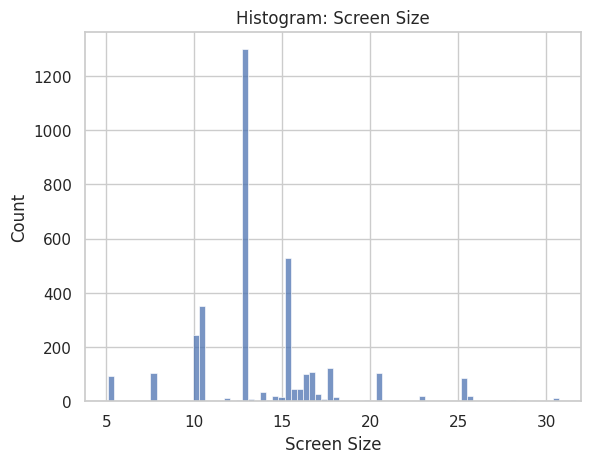

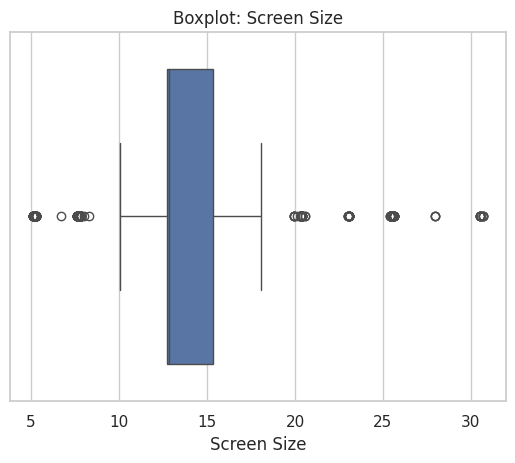

In [13]:
sns.histplot(data = df, x = 'screen_size')
plt.title('Histogram: Screen Size')
plt.xlabel('Screen Size')
plt.show();

print('\n')

sns.boxplot(data = df, x = 'screen_size')
plt.title('Boxplot: Screen Size')
plt.xlabel('Screen Size')
plt.show();

Observations:

Appears to be slightly right skewed. Many devices are consierdered outliers in terms of screen size

#### Main Camera

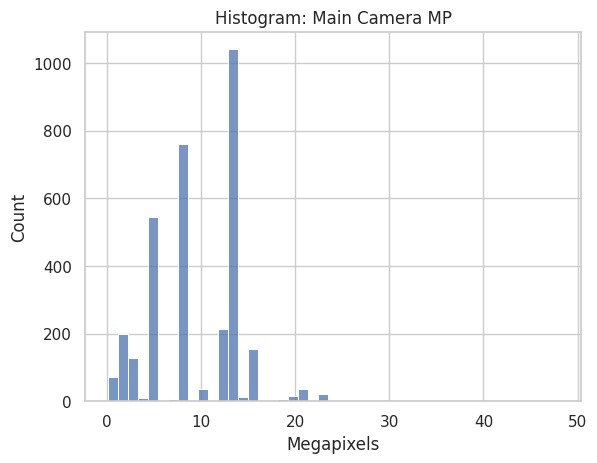

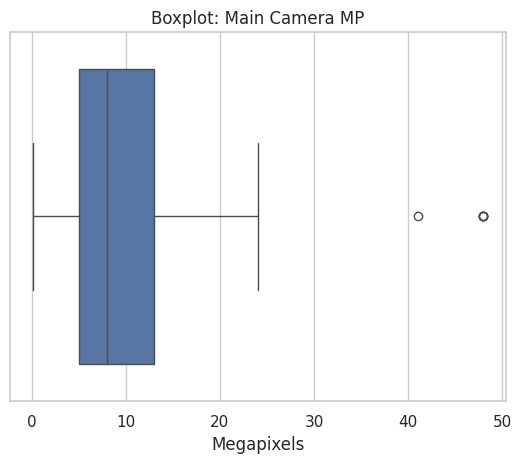

In [14]:
sns.histplot(data = df, x = 'main_camera_mp')
plt.title('Histogram: Main Camera MP')
plt.xlabel('Megapixels')
plt.show();

print('\n')

sns.boxplot(data = df, x = 'main_camera_mp')
plt.title('Boxplot: Main Camera MP')
plt.xlabel('Megapixels')
plt.show();

Observations:

Appears slightly right skewed, including outliers over 40 MP

#### Selfie Camera MP

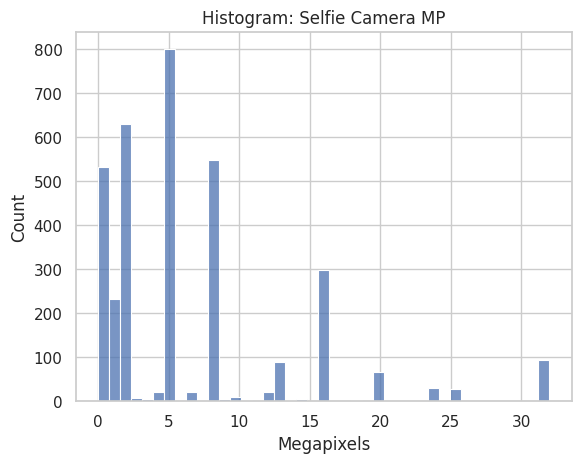

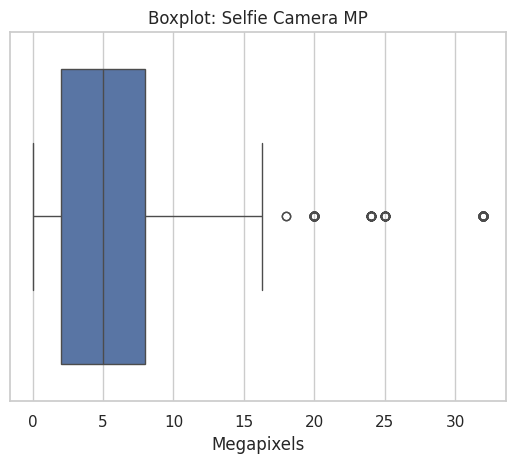

In [15]:
sns.histplot(data = df, x = 'selfie_camera_mp')
plt.title('Histogram: Selfie Camera MP')
plt.xlabel('Megapixels')
plt.show();

print('\n')

sns.boxplot(data = df, x = 'selfie_camera_mp')
plt.title('Boxplot: Selfie Camera MP')
plt.xlabel('Megapixels')
plt.show();

Observations:

Appears to be rightly skewed by a few outliers

#### Internal Memory

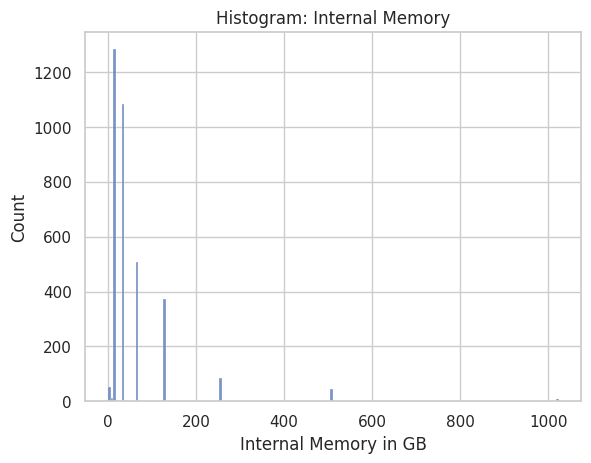

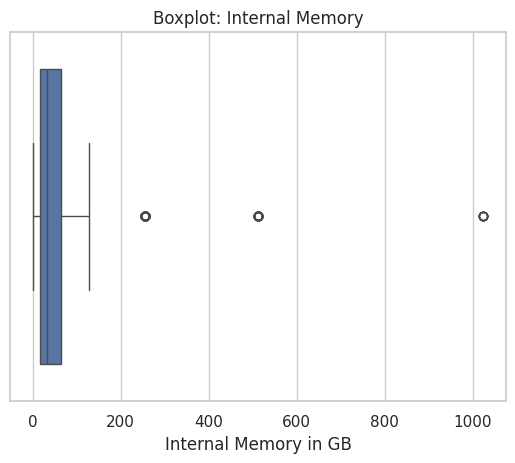

In [16]:
sns.histplot(data = df, x = 'int_memory')
plt.title('Histogram: Internal Memory')
plt.xlabel('Internal Memory in GB')
plt.show();

print('\n')

sns.boxplot(data = df, x = 'int_memory')
plt.title('Boxplot: Internal Memory')
plt.xlabel('Internal Memory in GB')
plt.show();

Observations:

Appears to be highly right skewed, likely due to the some outlier devices with very high internal memory

#### RAM

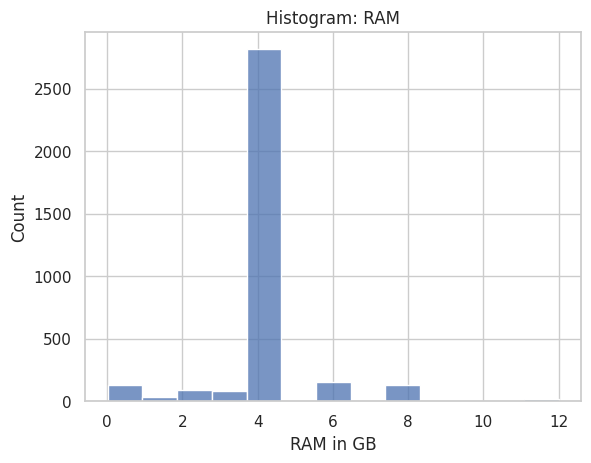

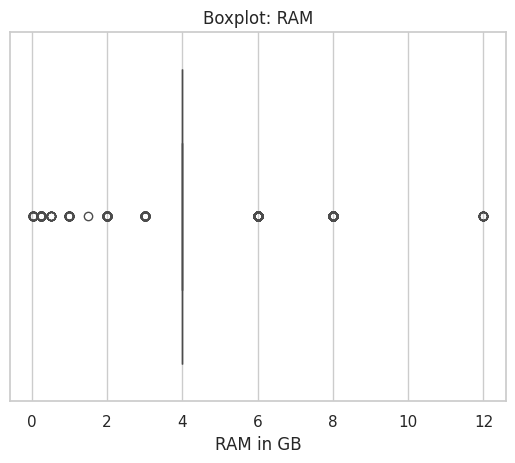

In [17]:
sns.histplot(data = df, x = 'ram')
plt.title('Histogram: RAM')
plt.xlabel('RAM in GB')
plt.show();

print('\n')

sns.boxplot(data = df, x = 'ram')
plt.title('Boxplot: RAM')
plt.xlabel('RAM in GB')
plt.show();

Observations:

It appears that most devices have 4 GB of RAM with a few outliers above and below.

#### Battery

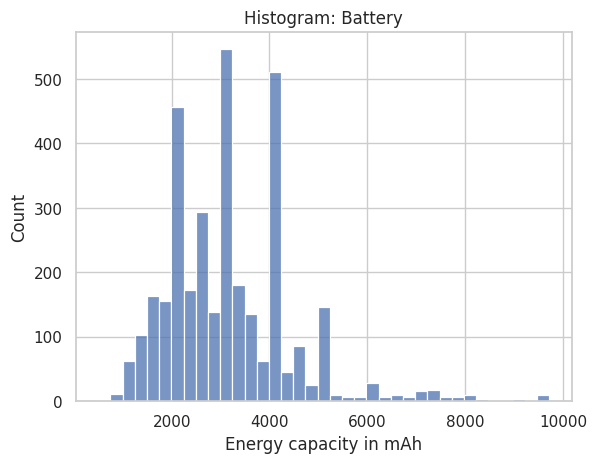

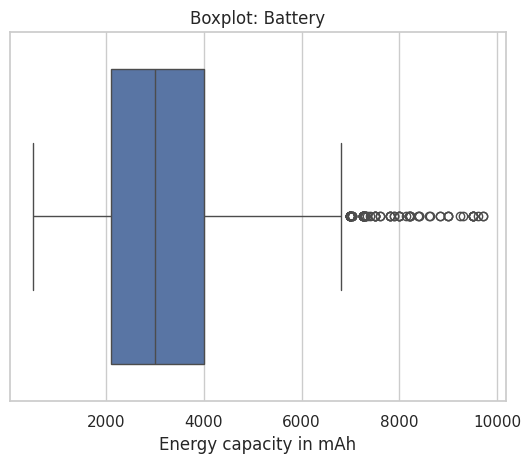

In [18]:
sns.histplot(data = df, x = 'battery')
plt.title('Histogram: Battery')
plt.xlabel('Energy capacity in mAh')
plt.show();

print('\n')

sns.boxplot(data = df, x = 'battery')
plt.title('Boxplot: Battery')
plt.xlabel('Energy capacity in mAh')
plt.show();

Observations:

Appears to be slightly right skewed with some devices having very large capacity batteries.

#### Weight

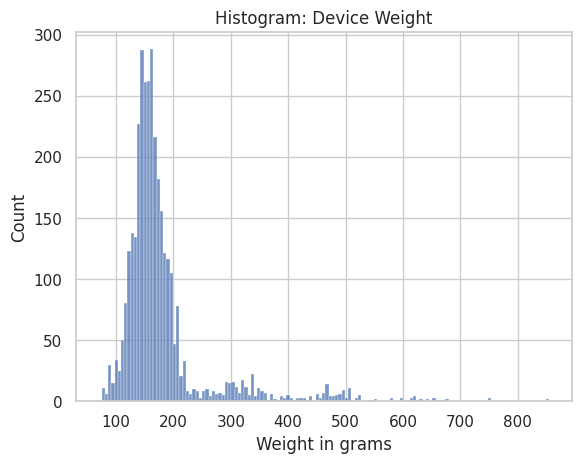

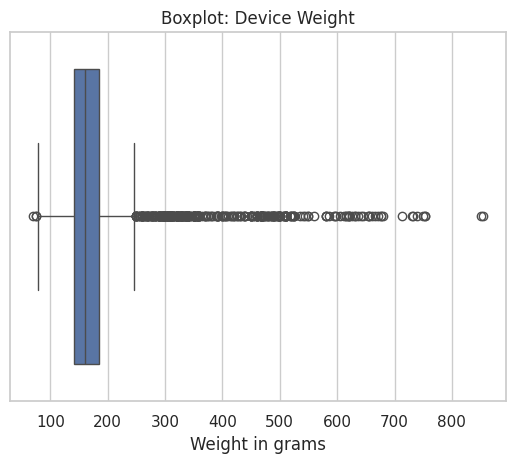

In [19]:
sns.histplot(data = df, x = 'weight')
plt.title('Histogram: Device Weight')
plt.xlabel('Weight in grams')
plt.show();

print('\n')

sns.boxplot(data = df, x = 'weight')
plt.title('Boxplot: Device Weight')
plt.xlabel('Weight in grams')
plt.show();

Observations:

Weight appears to be rightly skewed by many outlier devices with significantly heavy weights

#### Brand Name

Text(0.5, 1.0, 'Counts of Devices for Each Brand')

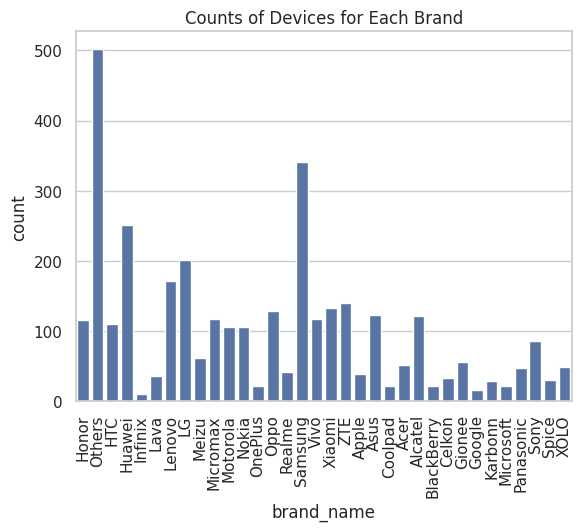

In [20]:
sns.countplot(data = df, x='brand_name')
plt.xticks(rotation=90)
plt.title('Counts of Devices for Each Brand')

#### Days Used

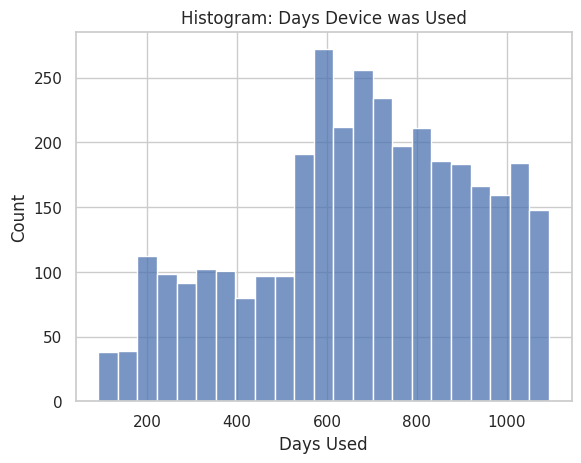

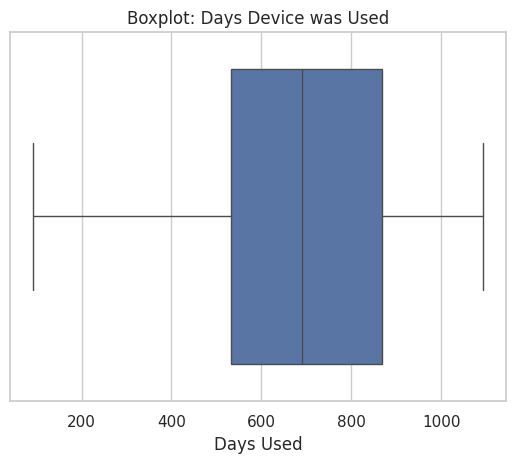

In [21]:
sns.histplot(data = df, x = 'days_used')
plt.title('Histogram: Days Device was Used')
plt.xlabel('Days Used')
plt.show();

print('\n')

sns.boxplot(data = df, x = 'days_used')
plt.title('Boxplot: Days Device was Used')
plt.xlabel('Days Used')
plt.show();

Observations:

Days used appears to be slightly left skewed

#### Normalized New Price

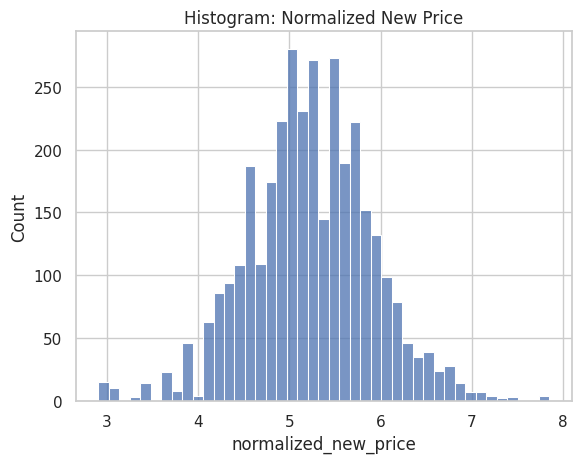

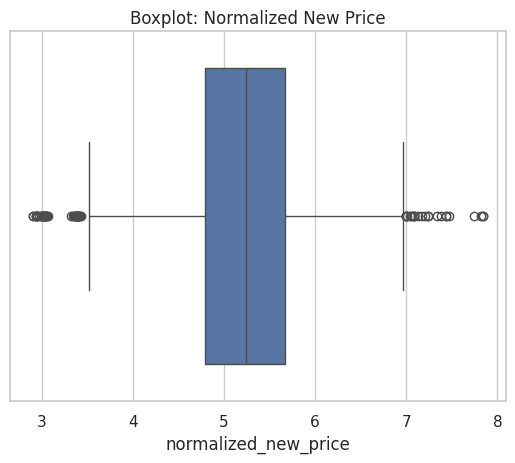

In [22]:
sns.histplot(data = df, x = 'normalized_new_price')
plt.title('Histogram: Normalized New Price')
plt.show();

print('\n')

sns.boxplot(data = df, x = 'normalized_new_price')
plt.title('Boxplot: Normalized New Price')
plt.show();

#### Normalized Used Price (Question 1)

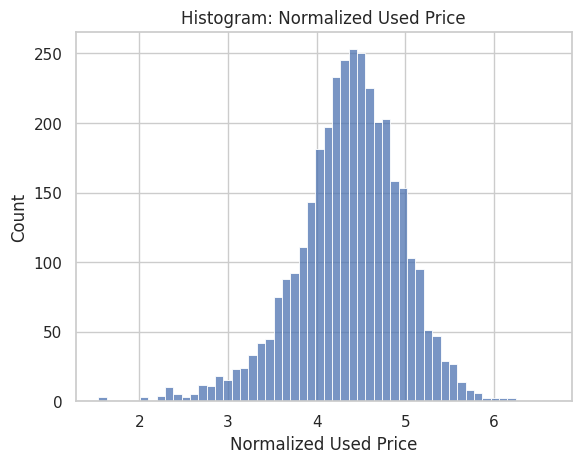

In [23]:
sns.histplot(data = df, x = 'normalized_used_price')
plt.title('Histogram: Normalized Used Price')
plt.xlabel('Normalized Used Price')
plt.show();

Observations:

The distribution of normalized used price appears fairly normal.

#### Operating System (Question 2)

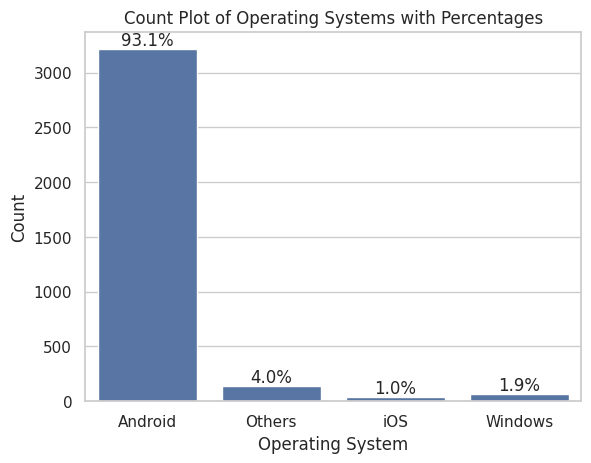

In [24]:
sns.countplot(data=df, x='os')

# Calculate percentages
total = float(len(df))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate('{:.1f}%'.format((height / total) * 100), (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom')

plt.xlabel('Operating System')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.title('Count Plot of Operating Systems with Percentages')  # Title of the plot
plt.show()

Observations:

The vast majority of devices run on the Anroid OS (93.1%).

#### 4G Availability

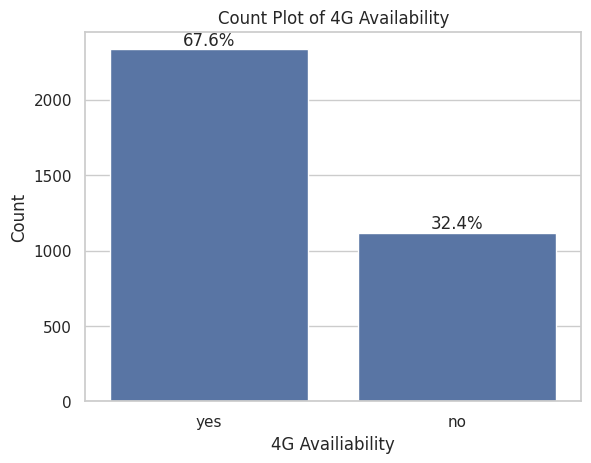

In [25]:
sns.countplot(data=df, x='4g')

# Calculate percentages
total = float(len(df))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate('{:.1f}%'.format((height / total) * 100), (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom')

plt.xlabel('4G Availiability')
plt.ylabel('Count')
plt.title('Count Plot of 4G Availability')
plt.show();

Observations:

It appears that a majority of devices have 4G availability

#### 5G Availability

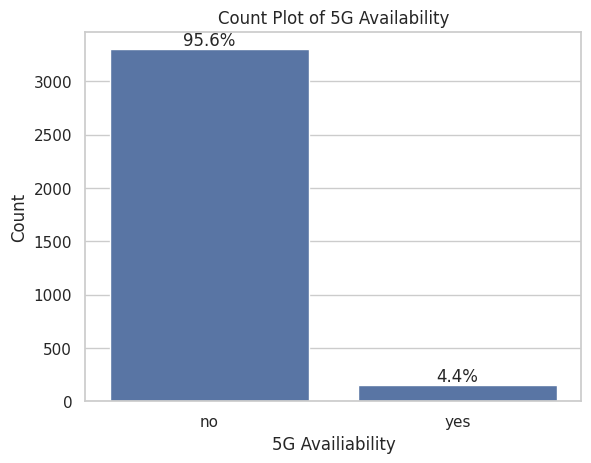

In [26]:
sns.countplot(data=df, x='5g')

# Calculate percentages
total = float(len(df))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate('{:.1f}%'.format((height / total) * 100), (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom')

plt.xlabel('5G Availiability')
plt.ylabel('Count')
plt.title('Count Plot of 5G Availability')
plt.show();

Observations:

Almost all devices are able to use 5G

#### Release Year

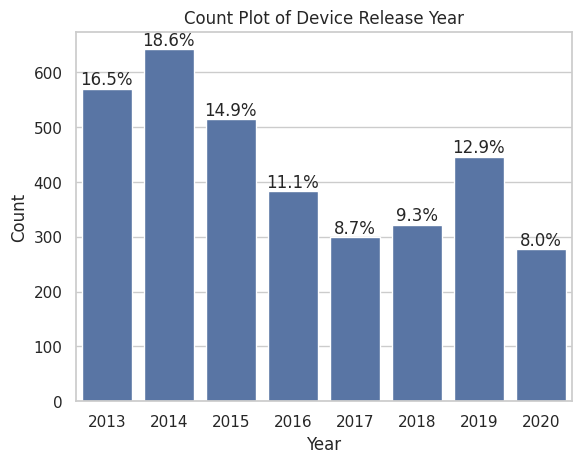

In [27]:
sns.countplot(data=df, x='release_year')

# Calculate percentages
total = float(len(df))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate('{:.1f}%'.format((height / total) * 100), (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count Plot of Device Release Year')
plt.show();

Observations:

The most devices were released in 2014 and the least in 2020.

### Multivariate Analysis and Answers to above Questions

#### RAM Variation by Brand (Question 3)

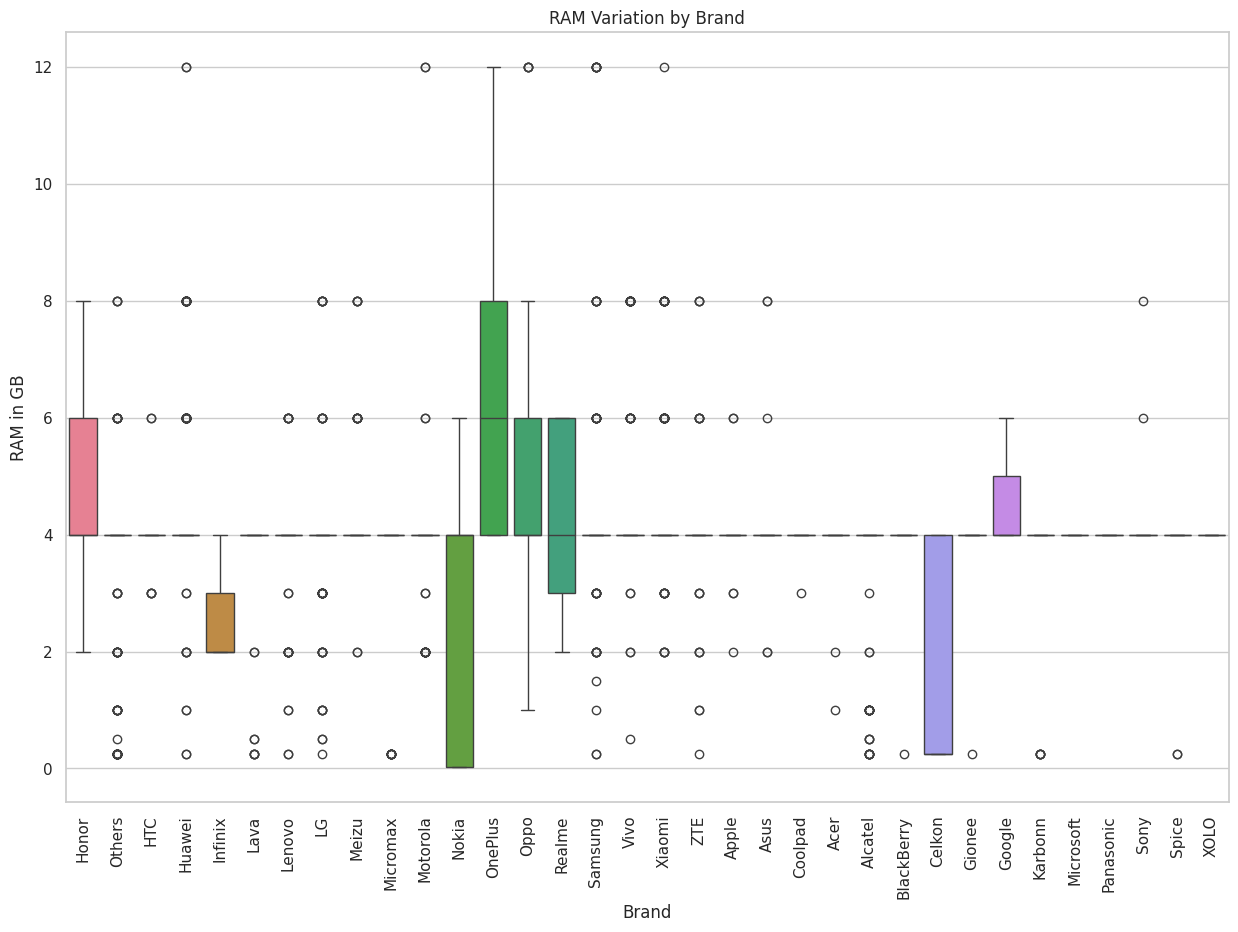

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df, x = 'brand_name', y = 'ram', hue = 'brand_name')
plt.title('RAM Variation by Brand')
plt.xlabel('Brand')
plt.ylabel('RAM in GB')
plt.xticks(rotation=90)
plt.show();

Observations:

It seems that 4gb of RAM is very popular amongst most brands. The median for many brands falls at 4gb. It can also be noted that that we see a very slim box at 4gb for most brands, meaning that a large number of their devices use 4gb.

Most brands offer devices with RAM above or below 4gb but they are considered outliers for all brands except Honor, Infinix, Nokia, OnePlus, Oppo, Realme, Celkon, and Google.

#### Weight in Devices with Large Batteries (Question 4)

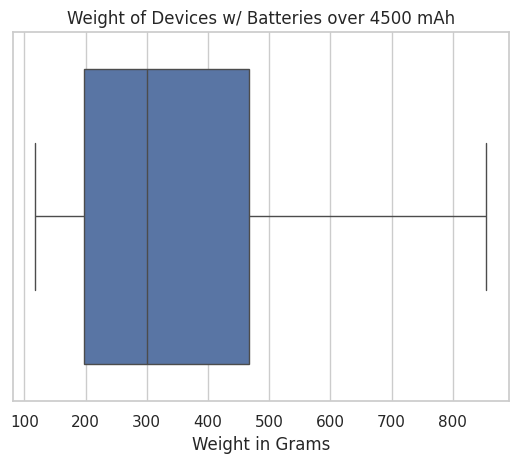

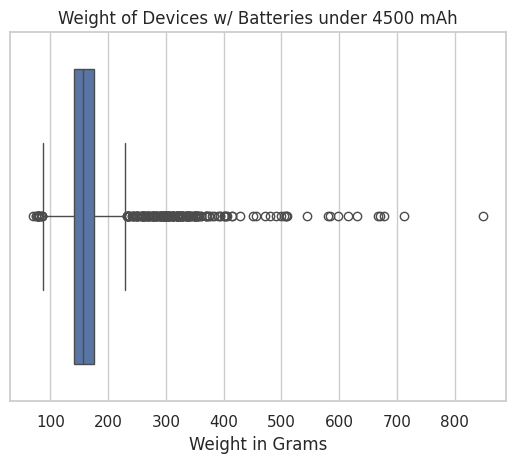

In [29]:
# Create a new data frame with just batteries over 4500 mAh
large_battery_df = df[df['battery']>4500]
small_battery_df = df[df['battery']<= 4500]

# Boxplot for devices w/ batteries over 4500 mAh
sns.boxplot(data = large_battery_df, x = 'weight')
plt.title('Weight of Devices w/ Batteries over 4500 mAh')
plt.xlabel('Weight in Grams')
plt.show();

print('\n')

# Boxplot for devices w/ batteries less than or equal 4500 mAh
sns.boxplot(data = small_battery_df, x = 'weight')
plt.title('Weight of Devices w/ Batteries under 4500 mAh')
plt.xlabel('Weight in Grams')
plt.show();

Observations:

Just through the univariate analysis, it is clear that battery size has some correlation to weight. As we can see in the first boxplot (Larger Batteries), 50% of the data is greater than 300 grams. In the boxplot with the smaller batteries we can see that anything over about 220 grams is considered an outlier.

#### Devices with Screen Sizes Larger than 6 by Brand (Question 5)

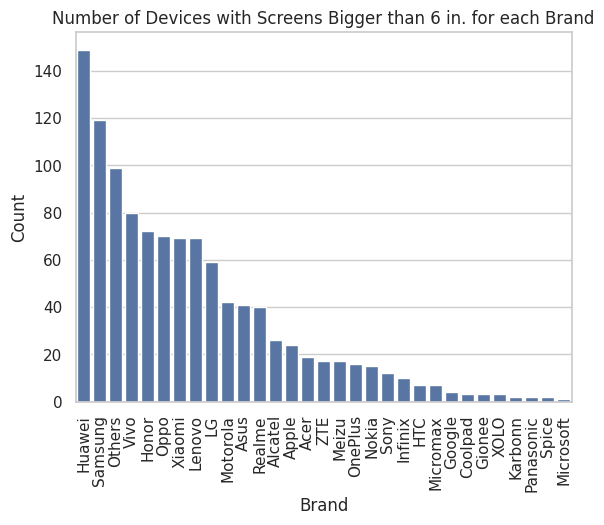

In [30]:
# Creating a data frame of devices with screens larger than 6 inches (must convert in to cm)
large_screen_df = df[df['screen_size']>6*2.54]

# Counts for each brand
count_large_screen = large_screen_df['brand_name'].value_counts().reset_index()
count_large_screen.columns = ['brand_name', 'count']

# Bar graph of counts of devices with screens over 6 in for each brans
sns.barplot(data = count_large_screen, x = 'brand_name', y = 'count')
plt.title('Number of Devices with Screens Bigger than 6 in. for each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show();

Observations:

Huawei is the brand with the most devices with screens over 6 in. They offer more than 140 devices with larger than a 6 in. screen.

#### Distribution of Devices with Selfie Cameras Greater than 8 MP Selfie Cameras by Brand (Question 6)

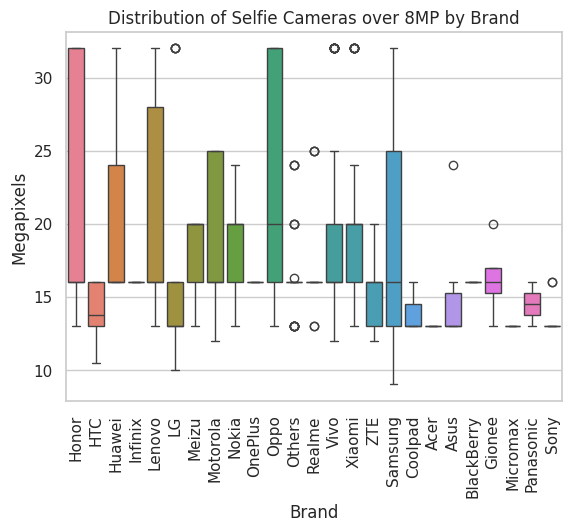

In [31]:
# Create data frame of devices with selfie cameras greater than 8MP
over_8MP_sc = df[df['selfie_camera_mp']>8]

# Boxplot of Selfie Camera MP greater than 8MP for each brand
sns.boxplot(data = over_8MP_sc, x = 'brand_name', y = 'selfie_camera_mp', hue = 'brand_name')
plt.title('Distribution of Selfie Cameras over 8MP by Brand')
plt.xlabel('Brand')
plt.ylabel('Megapixels')
plt.xticks(rotation=90)
plt.show();

Observations:

It appears that Samsung has the largest variation in selfie cameras. Honor and Oppo brands have the highest IQR of selfie camera megapixels.

#### Correlation (Question 7)

<Axes: >

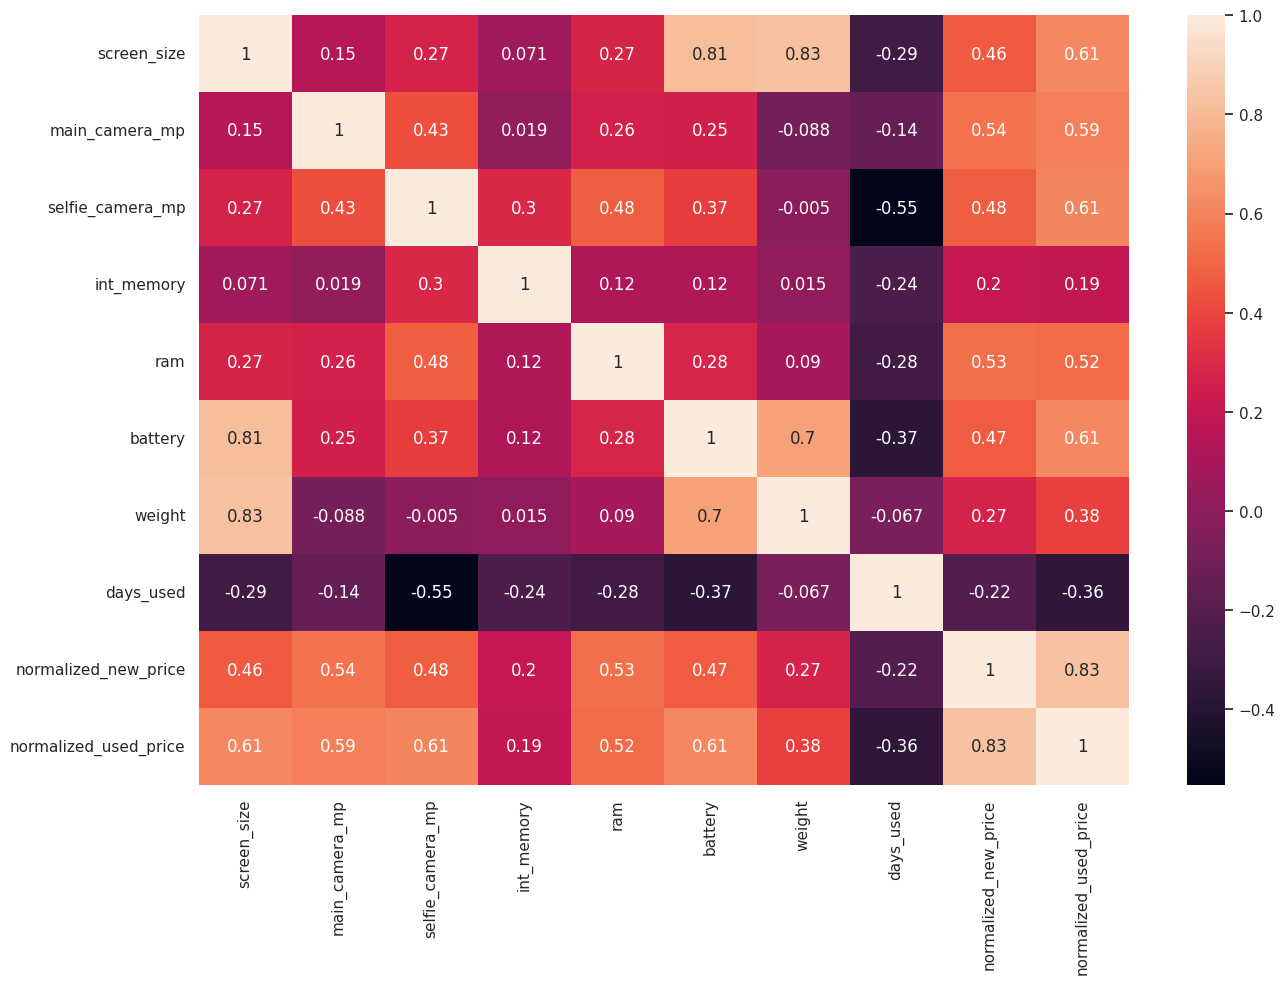

In [32]:
# Separating numeric columns of the data frame
num_col = ['screen_size','main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight','days_used','normalized_new_price','normalized_used_price']

plt.figure(figsize=[15,10])
sns.heatmap(df[num_col].corr(), annot=True)

Observations:

* Normalized used price is most strongly correlated with normalized new price and has a fairly strong correlation with battery, screen size, and selfie camera mp.
* Weight and screen size are strongly correlated
* Battery and screen size are strongly correlated
* Battery and weight are also strongly correlated

#### Price and Brand

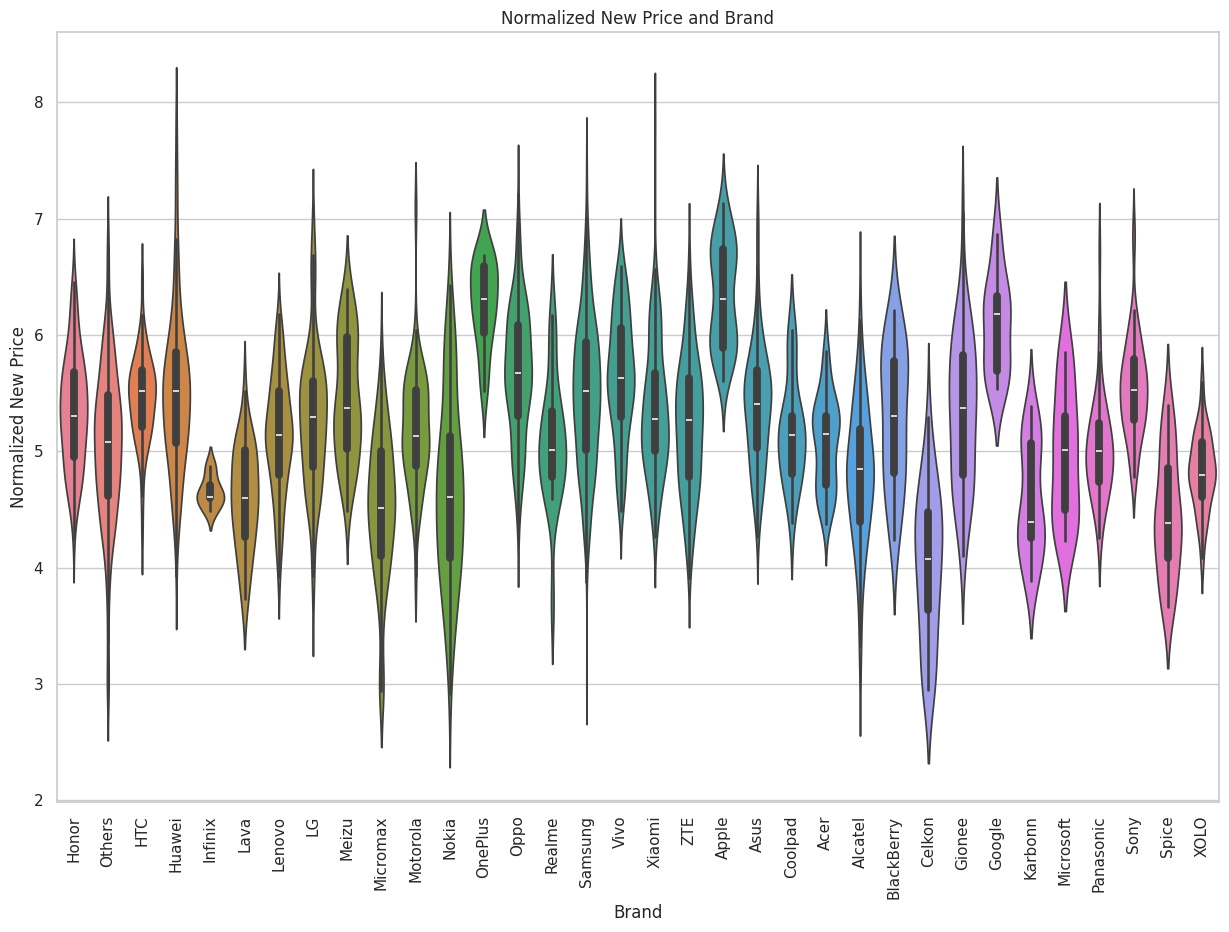

In [33]:
plt.figure(figsize=[15,10])
sns.violinplot(data = df, x= 'brand_name', y= 'normalized_new_price', hue='brand_name')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.title('Normalized New Price and Brand')
plt.ylabel('Normalized New Price')
plt.show();

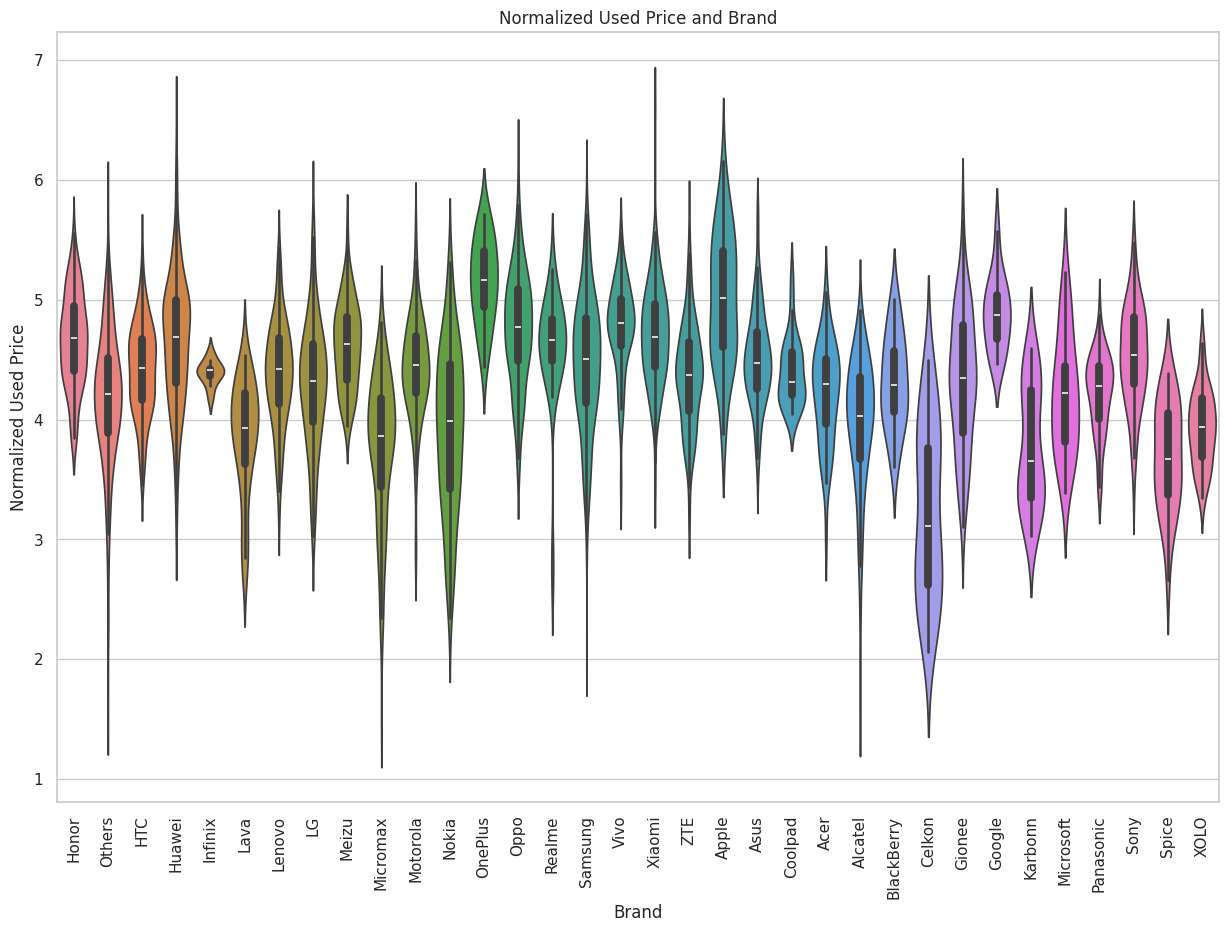

In [34]:
plt.figure(figsize=[15,10])
sns.violinplot(data = df, x= 'brand_name', y= 'normalized_used_price', hue='brand_name')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.title('Normalized Used Price and Brand')
plt.ylabel('Normalized Used Price')
plt.show();

#### Price and Internal memory


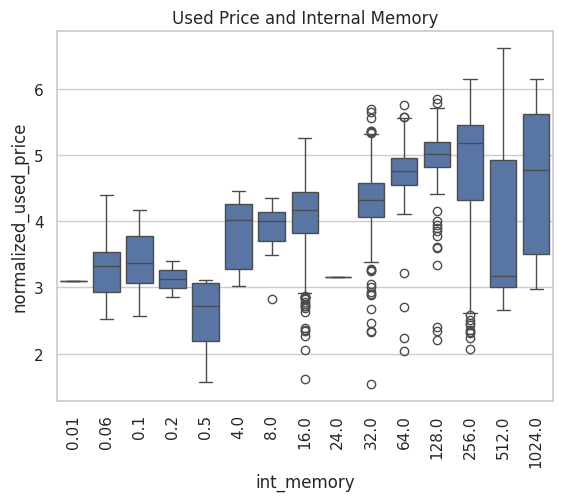

In [35]:
sns.boxplot(data = df, x = 'int_memory', y = 'normalized_used_price')
plt.title('Used Price and Internal Memory')
plt.xticks(rotation=90)
plt.show();

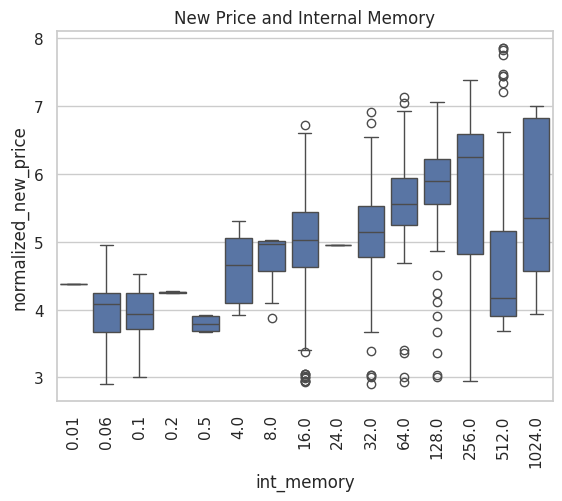

In [36]:
sns.boxplot(data = df, x = 'int_memory', y = 'normalized_new_price')
plt.title('New Price and Internal Memory')
plt.xticks(rotation=90)
plt.show();

#### Used Price on 5g vs 4g

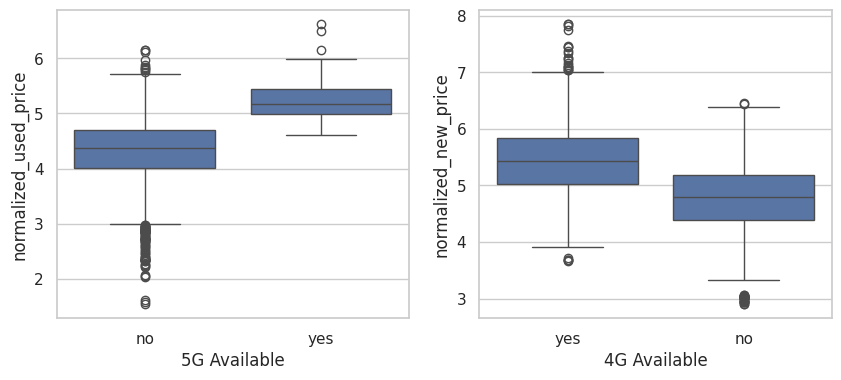

In [37]:
plt.figure(figsize=[10,4])

plt.subplot(121)
sns.boxplot(data = df, x = '5g', y = 'normalized_used_price')
plt.xlabel('5G Available')

plt.subplot(122)
sns.boxplot(data = df, x='4g', y='normalized_new_price')
plt.xlabel('4G Available')
plt.show();

#### Used prices over years

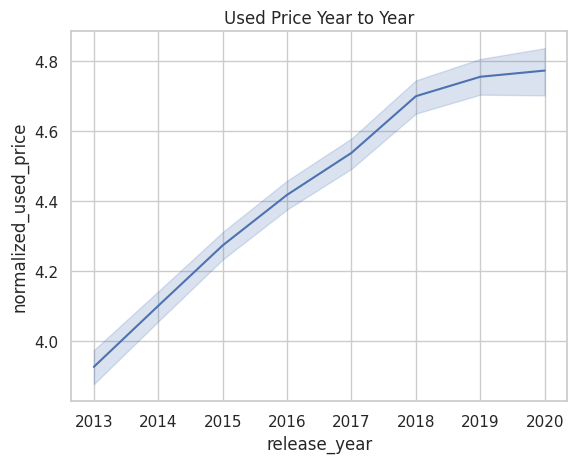

In [38]:
sns.lineplot(data = df, x = 'release_year', y = 'normalized_used_price')
plt.title('Used Price Year to Year')
plt.show();

#### Pairplot


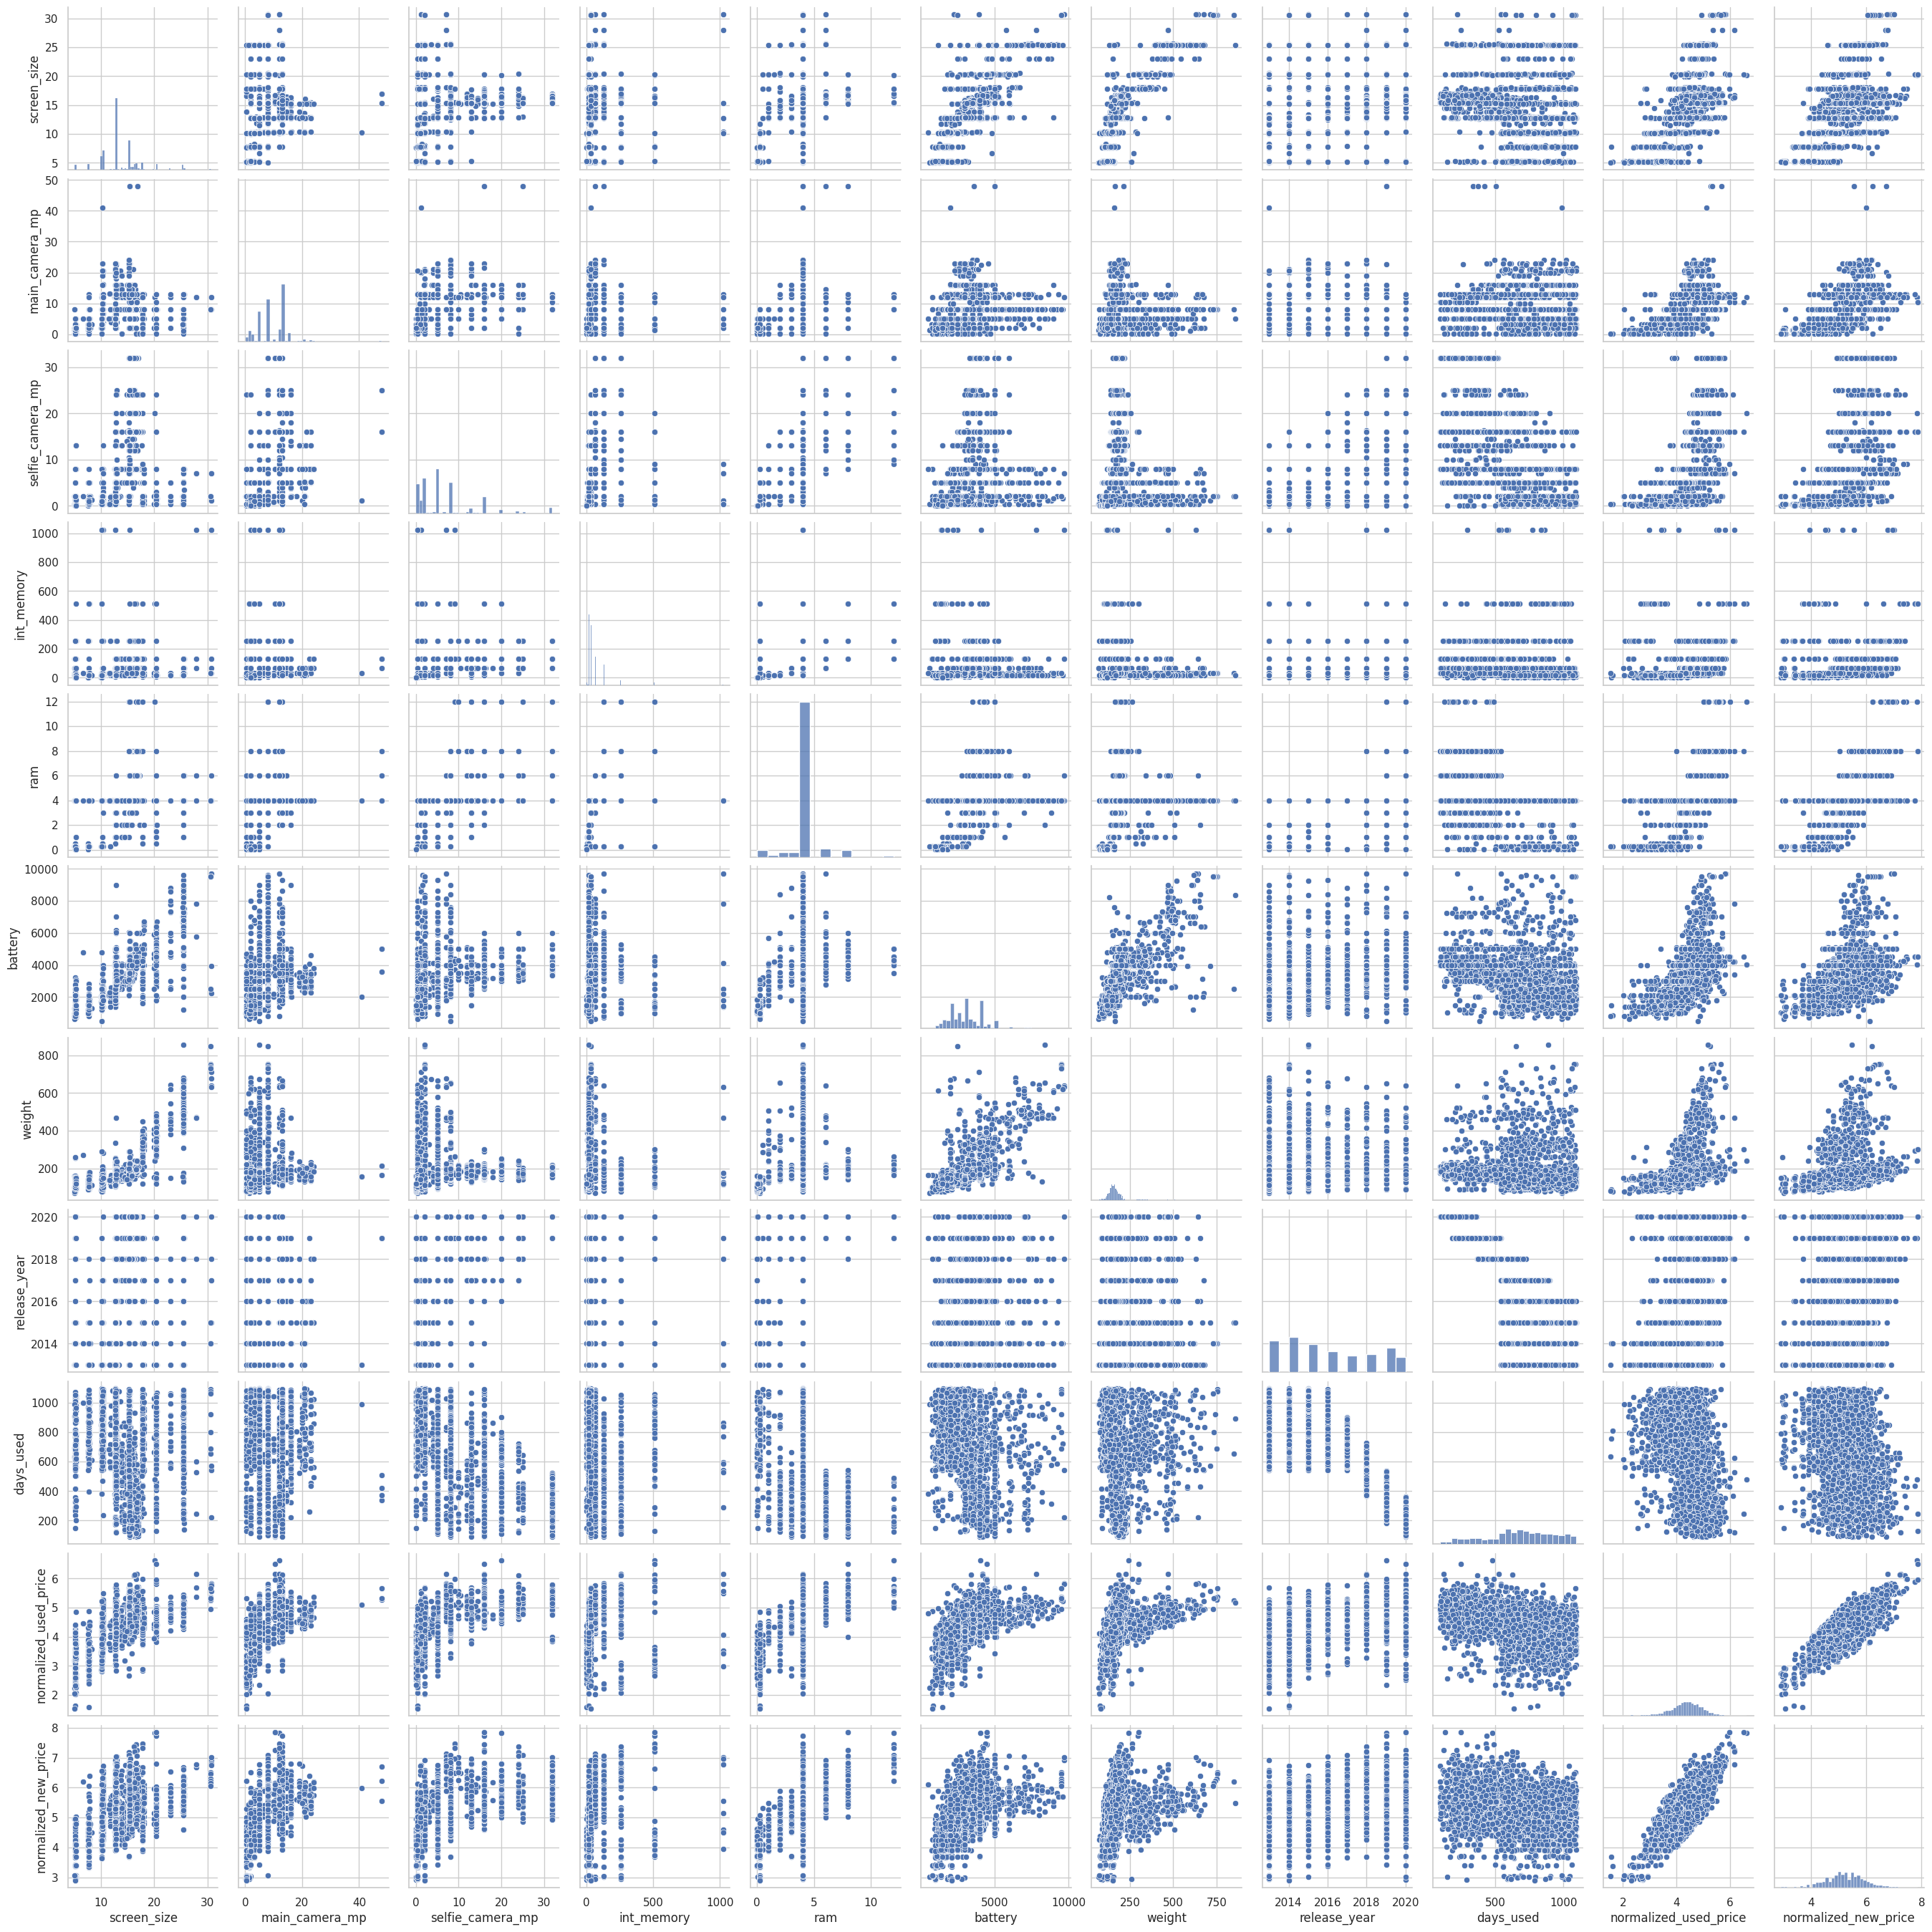

In [39]:
sns.pairplot(data = df)
plt.show();

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [40]:
# Making a copy of data to make changes to without changing the original
df1 = df.copy()

In [41]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

We have a few missing values in the main camera mp, selfie camera mp, internal memory, RAM, battery, and weight. We will replace these with the **median** for each based on its **Brand and Release Year**.

In [42]:
cols_w_missing_vals = ['main_camera_mp','selfie_camera_mp','int_memory','ram', 'battery', 'weight',]

for col in cols_w_missing_vals:
    df1[col] = df1[col].fillna(value=df1.groupby(['release_year', 'brand_name'])[col].transform('median'))

# checking for missing values
print(df1.isnull().sum())

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


We still have a few columns with missing values. Lets try grouping by only brand name to fill remaining columns

In [43]:
cols_w_missing_vals = ['main_camera_mp','selfie_camera_mp', 'battery', 'weight',]

for col in cols_w_missing_vals:
    df1[col] = df1[col].fillna(value=df1.groupby(['brand_name'])[col].transform('median'))

# checking for missing values
print(df1.isnull().sum())

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64


There are a few more missing values in the main camera mp column. Lets fill the remaining with the column median

In [44]:
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(df1['main_camera_mp'].median())

# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering

I'd like to convert the release_year column into device_age by subtracting the release_year from 2021 (when the data was collected). I believe this would help simplify the model by eliminating a variable that is not numeric in nature.

In [45]:
df1['device_age'] = 2021 - df1['release_year']
df1.drop('release_year', axis=1, inplace=True)
df1['device_age'].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: device_age, dtype: float64

### Outlier Detection

Lets take a look at the outliers. I do not plan on removing any outliers because they are proper values and are representative of a device.

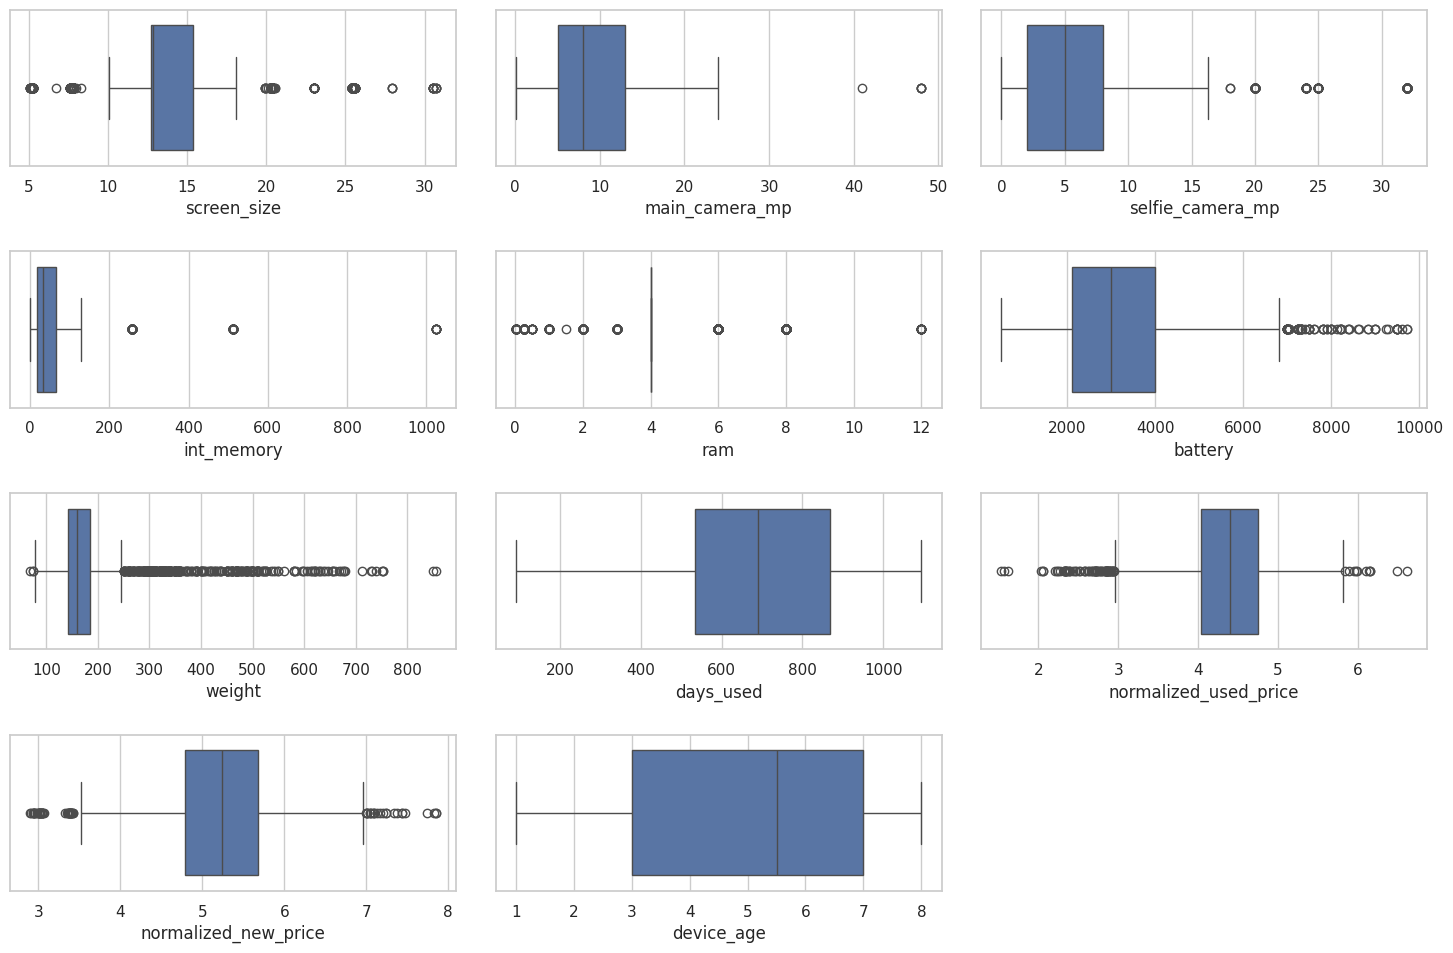

In [46]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Data Preparation for Modeling

* We want to predict the price of a used device
* Before we build our model, we will have to encode categorical features
* We will also split the data into train and test so that we can evaluate the model that we build with the train data

In [47]:
# defining X and Y variables
X = df1.drop(['normalized_used_price'], axis=1)
Y = df1['normalized_used_price']

print(X.head())
print(Y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  device_age  
0              4.715100           1  
1              5.519018           1  
2              5.884631           1  
3              5.630961           1  
4              4

In [48]:
# adding intercept to data
X = sm.add_constant(X)

In [49]:
# creating dummy variables for 'os' column, 'brand_name' columns, and the '4g' and '5g' columns
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0        127              4.715100  ...             False   
1   4300.0   213.0        325              5.519018  ...             False   
2   4200.0   213.0        162              5.884631  ...             False   
3   7250.0   480.0        345              5.630961  ...             False   
4   5000.0   185.0        293              4.947837  ...             False   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0            False            False              False           False   
1            False            False              False           False   
2            False            False              False           False   
3            False            False              False           False   
4            False            False              False           False   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0      False       False   False    True   False  
1      False       False   False    True    True  
2      False       False   False    True    True  
3      False       False   False    True    True  
4      False       False   False    True   False  

[5 rows x 49 columns]

In [50]:
# converting the bool data types into float type for modeling
X = X.astype(float)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0      127.0              4.715100  ...               0.0   
1   4300.0   213.0      325.0              5.519018  ...               0.0   
2   4200.0   213.0      162.0              5.884631  ...               0.0   
3   7250.0   480.0      345.0              5.630961  ...               0.0   
4   5000.0   185.0      293.0              4.947837  ...               0.0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0              0.0              0.0                0.0             0.0   
1              0.0              0.0                0.0             0.0   
2              0.0              0.0                0.0             0.0   
3              0.0              0.0                0.0             0.0   
4              0.0              0.0                0.0             0.0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0        0.0         0.0     0.0     1.0     0.0  
1        0.0         0.0     0.0     1.0     1.0  
2        0.0         0.0     0.0     1.0     1.0  
3        0.0         0.0     0.0     1.0     1.0  
4        0.0         0.0     0.0     1.0     0.0  

[5 rows x 49 columns]

In [51]:
# splitting data into train and test groups
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print('Number of rows in train set:', x_train.shape[0])
print('Number of rows in test set:', x_test.shape[0])

Number of rows in train set: 2417
Number of rows in test set: 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  3454 non-null   float64
 1   screen_size            3454 non-null   float64
 2   main_camera_mp         3454 non-null   float64
 3   selfie_camera_mp       3454 non-null   float64
 4   int_memory             3454 non-null   float64
 5   ram                    3454 non-null   float64
 6   battery                3454 non-null   float64
 7   weight                 3454 non-null   float64
 8   days_used              3454 non-null   float64
 9   normalized_new_price   3454 non-null   float64
 10  device_age             3454 non-null   float64
 11  brand_name_Alcatel     3454 non-null   float64
 12  brand_name_Apple       3454 non-null   float64
 13  brand_name_Asus        3454 non-null   float64
 14  brand_name_BlackBerry  3454 non-null   float64
 15  bran

In [53]:
X.describe().T

count         mean          std         min  \
const                  3454.0     1.000000     0.000000    1.000000   
screen_size            3454.0    13.713115     3.805280    5.080000   
main_camera_mp         3454.0     9.617597     4.749438    0.080000   
selfie_camera_mp       3454.0     6.555067     6.968440    0.000000   
int_memory             3454.0    54.528474    84.934991    0.010000   
ram                    3454.0     4.032620     1.368598    0.020000   
battery                3454.0  3132.577446  1298.884193  500.000000   
weight                 3454.0   182.636856    88.360445   69.000000   
days_used              3454.0   674.869716   248.580166   91.000000   
normalized_new_price   3454.0     5.233107     0.683637    2.901422   
device_age             3454.0     5.034742     2.298455    1.000000   
brand_name_Alcatel     3454.0     0.035032     0.183887    0.000000   
brand_name_Apple       3454.0     0.011291     0.105674    0.000000   
brand_name_Asus        3454.0     0.035321     0.184618    0.000000   
brand_name_BlackBerry  3454.0     0.006369     0.079566    0.000000   
brand_name_Celkon      3454.0     0.009554     0.097291    0.000000   
brand_name_Coolpad     3454.0     0.006369     0.079566    0.000000   
brand_name_Gionee      3454.0     0.016213     0.126312    0.000000   
brand_name_Google      3454.0     0.004343     0.065766    0.000000   
brand_name_HTC         3454.0     0.031847     0.175618    0.000000   
brand_name_Honor       3454.0     0.033584     0.180183    0.000000   
brand_name_Huawei      3454.0     0.072669     0.259631    0.000000   
brand_name_Infinix     3454.0     0.002895     0.053737    0.000000   
brand_name_Karbonn     3454.0     0.008396     0.091258    0.000000   
brand_name_LG          3454.0     0.058193     0.234143    0.000000   
brand_name_Lava        3454.0     0.010423     0.101573    0.000000   
brand_name_Lenovo      3454.0     0.049508     0.216957    0.000000   
brand_name_Meizu       3454.0     0.017950     0.132790    0.000000   
brand_name_Micromax    3454.0     0.033874     0.180930    0.000000   
brand_name_Microsoft   3454.0     0.006369     0.079566    0.000000   
brand_name_Motorola    3454.0     0.030689     0.172499    0.000000   
brand_name_Nokia       3454.0     0.030689     0.172499    0.000000   
brand_name_OnePlus     3454.0     0.006369     0.079566    0.000000   
brand_name_Oppo        3454.0     0.037348     0.189641    0.000000   
brand_name_Others      3454.0     0.145339     0.352493    0.000000   
brand_name_Panasonic   3454.0     0.013607     0.115871    0.000000   
brand_name_Realme      3454.0     0.011870     0.108318    0.000000   
brand_name_Samsung     3454.0     0.098726     0.298337    0.000000   
brand_name_Sony        3454.0     0.024899     0.155839    0.000000   
brand_name_Spice       3454.0     0.008686     0.092804    0.000000   
brand_name_Vivo        3454.0     0.033874     0.180930    0.000000   
brand_name_XOLO        3454.0     0.014186     0.118276    0.000000   
brand_name_Xiaomi      3454.0     0.038217     0.191746    0.000000   
brand_name_ZTE         3454.0     0.040533     0.197234    0.000000   
os_Others              3454.0     0.039664     0.195197    0.000000   
os_Windows             3454.0     0.019398     0.137939    0.000000   
os_iOS                 3454.0     0.010423     0.101573    0.000000   
4g_yes                 3454.0     0.676028     0.468057    0.000000   
5g_yes                 3454.0     0.044007     0.205140    0.000000   

                               25%          50%          75%          max  
const                     1.000000     1.000000     1.000000     1.000000  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram              

### Device Age

* We should take a look at the 'device_age' column we created by subtracting the release year from 2021.
* It should look similar to the Countplot of release year except the order will be flipped
* For example, a device released in 2014 will now be 7 years old.

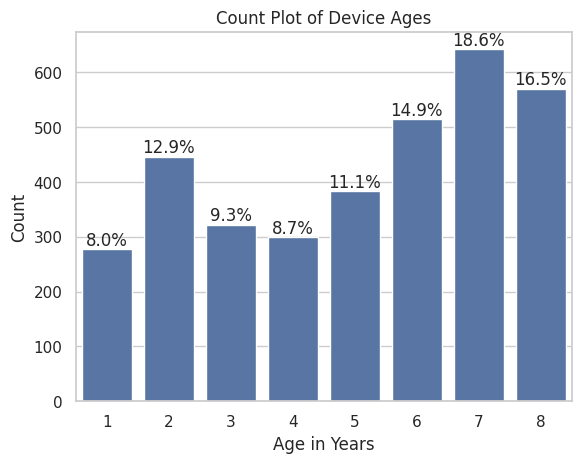

In [54]:
sns.countplot(data=df1, x='device_age')

# Calculate percentages
total = float(len(df))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate('{:.1f}%'.format((height / total) * 100), (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom')

plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.title('Count Plot of Device Ages')
plt.show();

## Model Building - Linear Regression

In [55]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                           16:47:03   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting Regression Results

**Adjusted R-squared and R-squared:**
  - From the regression summary, we can see we have an Adjusted R-square of 0.845 and an R-squared of 0.842.
  - This means that 84.2% of the variance in the training set can be explained by the model.

**Y-Intercept:**
- The *const* coefficient represent the y-intercept, which is 1.3156

**Coefficient of predictor variables:**
- The coefficients represent the change in Y output that occurs from a change in a predictor variable
- For example, the coefficient of *screen_size* is 0.0244

## Model Performance Check

* Now, we will check the performance of the model using the following metrics
  - RMSE: Root Mean Square Error
  - MAE: Mean Absolute Error
  - MAPE: Mean Absolute Percentage Error
  - $R^2$
  - Adjusted $R^2$
* The following function will be used to collect these metrics

In [56]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

Training Performance

In [57]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229884  0.180326   0.844886        0.841675  4.326841

Test Performance

In [58]:
print("Testing Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Testing Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238358  0.184749   0.842479        0.834659  4.501651

### Observations





* The training set and testing set have very close R-sqaured, so it seems that our model is not underfitting.
* The RMSE and MAE are comparable, so the model is not overfitting either.
* MAE suggests that the model can predict the normalized used price within a mean error of 0.184 on the test data.
* MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized used price of a device.

## Checking Linear Regression Assumptions

* In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
* Assumptions:
  - No Multicollinearity
  - Linearity of variables
  - Independence of error terms
  - Normality of error terms
  - No Heteroscedasticity

### Test for Multicollinearity

In [59]:
# checking the VIF of the predictor variables
vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    227.744081
screen_size                7.677290
main_camera_mp             2.285051
selfie_camera_mp           2.812473
int_memory                 1.364152
ram                        2.282352
battery                    4.081780
weight                     6.396749
days_used                  2.660269
normalized_new_price       3.119430
device_age                 4.899007
brand_name_Alcatel         3.405693
brand_name_Apple          13.057668
brand_name_Asus            3.332038
brand_name_BlackBerry      1.632378
brand_name_Celkon          1.774721
brand_name_Coolpad         1.468006
brand_name_Gionee          1.951272
brand_name_Google          1.321778
brand_name_HTC             3.410361
brand_name_Honor           3.340687
brand_name_Huawei          5.983852
brand_name_Infinix         1.283955
brand_name_Karbonn         1.573702
brand_name_LG              4.849832
brand_name_Lava            1.711360
brand_name_Lenovo          4.558941
brand_name_Mei

* Screen size and weight are the only variables with high VIFs that are not categorical/dummy variables
* Lets see the impact on adj. R-squared when we drop weight and screen size independently

In [60]:
# checking adj R-sqaured when we drop weight
x_train2 = x_train.drop(["weight"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.841 
Adjusted R-squared: 0.838


Dropping the weight predictor decreased adj. R-squared by 0.004 and R-squared by 0.001

In [61]:
# checking adj R-squared when we drop screen size
x_train3 = x_train.drop(["screen_size"], axis=1)
olsmod_2 = sm.OLS(y_train, x_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.842 
Adjusted R-squared: 0.838


Dropping the screen size predictor decreased the adj. R-squared by 0.004

After looking at the effect on adj. R-squared and R-squared, I have decided to drop screen size rather than weight because it did not affect the R-squared of the model.

In [62]:
# dropping screen size
x_train = x_train.drop(['screen_size'], axis=1)
x_test = x_test.drop(['screen_size'], axis=1)

In [63]:
olsmod_drop_screensize = sm.OLS(y_train, x_train)
olsres_drop_screensize = olsmod_drop_screensize.fit()
print(olsres_drop_screensize.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                           16:47:05   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [64]:
# rechecking the VIF of the predictor variables now that screen size has been dropped
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                    202.673906
main_camera_mp             2.281835
selfie_camera_mp           2.809009
int_memory                 1.362043
ram                        2.282350
battery                    3.842989
weight                     2.993855
days_used                  2.648929
normalized_new_price       3.077650
device_age                 4.730315
brand_name_Alcatel         3.405533
brand_name_Apple          13.000338
brand_name_Asus            3.326698
brand_name_BlackBerry      1.631042
brand_name_Celkon          1.774528
brand_name_Coolpad         1.467719
brand_name_Gionee          1.941437
brand_name_Google          1.319334
brand_name_HTC             3.399980
brand_name_Honor           3.340354
brand_name_Huawei          5.981046
brand_name_Infinix         1.283526
brand_name_Karbonn         1.573494
brand_name_LG              4.832548
brand_name_Lava            1.711092
brand_name_Lenovo          4.553789
brand_name_Meizu           2.176424
brand_name_Mic

Now that we dropped screen size, all numerical columns have acceptable VIFs.

### Dropping High P-value Variables

In [65]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'device_age', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [66]:
x_train2 = x_train[selected_features]
x_test2 = x_test[selected_features]

In [67]:
olsmod = sm.OLS(y_train, x_train2).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                           16:47:07   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Let's test the model performance again after eliminating variables with high p-values.

In [68]:
# checking model performance on training set
print("Training Performance\n")
olsmod_train_perf = model_performance_regression(olsmod, x_train2, y_train)
olsmod_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23403  0.182751    0.83924        0.838235  4.395407

In [69]:
# checking model performance on test set
print("Test Performance\n")
olsmod_test_perf = model_performance_regression(olsmod, x_test2, y_test)
olsmod_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.241434  0.186649   0.838387        0.836013  4.556349

**Observations**

* We now have no variables with a high p-value, so we will consider x_train2 as our final set of predictor variables and olsmod as the most updated model.
* Our adjusted R-sqaured in the current model is 0.838
* The adjusted R-squared in the model that did not exclude any predictor variables due to multicollinearity was 0.842
  - This means that by eliminating multicollinearity, we did not decrease the predictability of the model very much.
* RMSE and MAE values remain comparable for the train and test sets, showing that the model is not overfitting.

### Test for Linearity and Independence

* We are looking to see if the predictor variables have a linear relationship with the dependent variable (normalized used price).
* We are also making sure that the residuals are independent and do not follow a pattern.

In [70]:
# creating a dataframe with actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred['Actual Values']= y_train
df_pred['Fitted Values']= olsmod.fittedvalues
df_pred['Residuals']= olsmod.resid

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.867319   0.220169
1525       4.448399       4.602001  -0.153602
1128       4.315353       4.286957   0.028395
3003       4.282068       4.195169   0.086899
2907       4.456438       4.490563  -0.034125

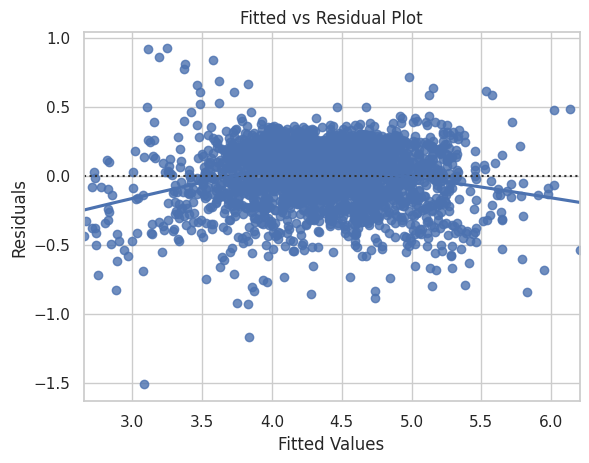

In [71]:
# plotting residuals vs fitted values
sns.residplot(data= df_pred, x='Fitted Values', y='Residuals', lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual Plot')
plt.show();

**Observations:**

* There appears to be no pattern in the 'Fitted vs Residual Plot', therefore the assumption of linearity and independence is satisfied.

### Test for Normality

* Here we want to check that the distributions of errors is as normal as possible.

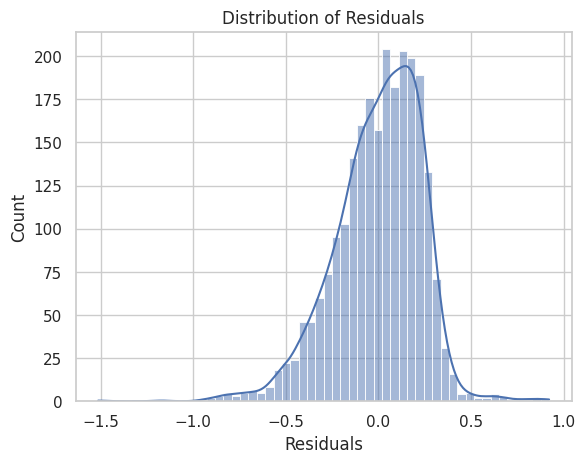

In [72]:
# First, lets look at the distribution of residuals
sns.histplot(data=df_pred, x='Residuals', kde=True)
plt.title('Distribution of Residuals')
plt.show();

* The histogram does have a bell shape and looks fairly normal.
* Next, lets look at the Q-Q plot

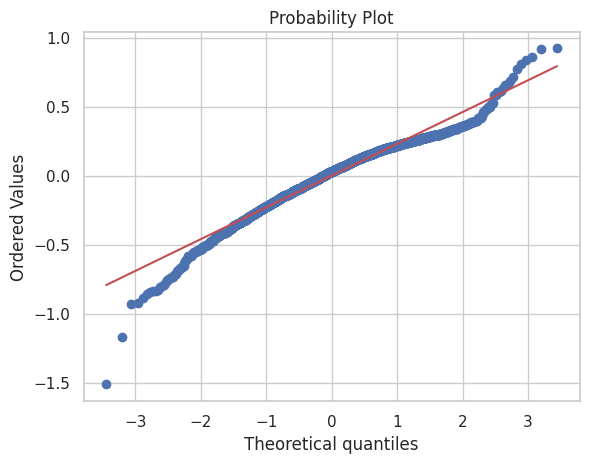

In [73]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab)
plt.show();

* Most points follow the straight line of the Q-Q plot
* However, it looks like the tails do not follow the straight line
* Next, lets use the Shapiro-Wilk test.

In [74]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

* Since the p-value < .05, the residuals are not normal according to the Shapiro-Wilk test.
* We can say that the residuals do not follow a normal distribution.
* However, we can say that as an approximation, the distribution of residuals is close to normal.
* Therefore, we can satisfy the assumption of normality.


### Test for Homoscedasticity

* We are looking to see if the variance of the residuals is symmetrically distributed across the regression line.
* Let's use the Goldfeldquandt test

#### Null and Alternate Hypotheses

* Null: Residuals are homoscedastic
* Alternate: Residuals are heteroscedastic

In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [76]:
name = ['F statistic','p-value']
test = sms.het_goldfeldquandt(df_pred['Residuals'],x_train2)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

Since the p-value is greater than 0.05 we can confirm that the residuals are homoscedastic and that the assumption has been met.

## Predictions on the test data

Now that we have met all of the linear regression assumptions, let's see how our model can predict the test data.

In [77]:
pred = olsmod.predict(x_test2)

df_pred_test = pd.DataFrame({'Actual': y_test, 'Predicted':pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995  4.566741   4.385671
2341  3.696103   4.003934
1913  3.592093   3.643812
688   4.306495   4.103463
650   4.522115   5.113026
2291  4.259294   4.398406
40    4.997685   5.459871
1884  3.875359   4.053143
2538  4.206631   4.035868
45    5.380450   5.227899

Observations of test predictions:

We can see that our model has performed fairly well. The predicted used prices are comparable to the actual used prices.

## Final Model

In [78]:
# renaming final predictors
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

In [79]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                           16:47:09   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [80]:
# checking final model performance on training set
print('Training Performance:\n')
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train)
olsmodel_final_train_perf

Training Performance:



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23403  0.182751    0.83924        0.838235  4.395407

In [81]:
# checking final model performance on testing set
print('Test Performance:\n')
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

Test Performance:



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.241434  0.186649   0.838387        0.836013  4.556349

Observations:

* All performance metrics (RMSE, MAE, R-sqaured, Adj. R-squared, and MAPE) are comparable between the Training and the Testing set.
* RMSE and MAE is low and comparable, so our model is not overfitting.
* The MAPE on the test suggests that our model can predict within 4.56% of the normalized used price.
* We can conclude that our model, *olsmodel_final*, is good for prediction and inference purposes.


## Actionable Insights and Recommendations

- The model is able to explain about 84% of the variance in the data and within 4.56% of the normalized used price on the test data, which is great.
- If the main camera megapixels on a device increases by one unit, then its normalized used price increases 0.021, when all other predictors are held constant.
- If the selfie camera megapixels on a device increases by one unit, then its normalized used price increases by 0.0138, when all other predictors are held constant.
- If the RAM on a device increases by one unit, then its normalized used price increases by 0.0207, when all other predictors are held constant.
- If the weight on a device increases by one unit, then its normalized used price increases by 0.0017, when all other predictors are held constant.
- If the normalized used price on a device increases by one unit, then its normalized used price increases by 0.4415, when all other predictors are held constant.
- If the device age, or years since the device was released, increases by one unit, then its normalized used price will decrease by 0.0292, when all other predictors are held constant.
- ReCell should consider selling devices that cost more when they were new, since new price increased the used price.
- Main and Selfie camera quality also increases the used price, so ReCell should look to sell phones with higher megapixel cameras.
- ReCell should also look to sell devices with more RAM, as they tend to sell at a higher used price.
- As the age of a device decreases the used price, ReCell should look to stock used phones that were released more recently.
- From the EDA, it can be seen that devices from OnePlus and Apple had the highest median used price, so ReCell should consider stocking these brands.
- ReCell should also consider gathering more data like consumer ratings, repair history, screen resolution, speaker quality, bluetooth capabilities, etc. on devices to better understand the device and have potentially better price predictability in their future models.

___